In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn import datasets
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, accuracy_score, recall_score, f1_score

<mark><font color='hotpink' size=8 face=雅黑>Date Preparing process for prediction model<font><mark>
    
    Basd on the previous visualization, I found some variable can be used to predict the persom is from where. Therefore, I am going to examine whether these variable can predict a person is from Asia region or from Western. 

### Step1: read the csv file

In [2]:
dfwv= pd.read_csv ('worldvalues-data.csv', na_values = '?', usecols = ['V2','V10','V23','V45','V47','V50','V52','V53','V67','V70','V71','V97','V120','V143','V163','V167','V172','V181','V203','V207'])
dfwv.head()

D:\200826\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10,46,48,51,53,54,69,123,163,183) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,V2,V10,V23,V45,V47,V50,V52,V53,V67,V70,V71,V97,V120,V143,V163,V167,V172,V181,V203,V207
0,Algeria,2,8,1,1,1,1,1,1,Very much like me,Very much like me,7,2,2,1,1,2,2,Never justifiable,Never justifiable
1,Algeria,2,5,1,1,2,2,3,1,Like me,Somewhat like me,5,2,1,3,2,2,2,Never justifiable,Never justifiable
2,Algeria,2,4,1,2,1,1,1,2,Very much like me,Like me,7,3,1,2,1,2,2,Never justifiable,Never justifiable
3,Algeria,2,8,2,1,2,2,2,1,Very much like me,Like me,5,2,2,3,2,2,2,Never justifiable,Never justifiable
4,Algeria,1,8,1,1,2,3,2,2,Like me,Not like me,4,3,2,2,3,3,2,Never justifiable,Never justifiable


In [3]:
dfwv.V2.unique()

array(['Algeria', 'Argentina', 'Armenia', 'Australia', 'Azerbaijan',
       'Belarus', 'Brazil', 'Colombia', 'Cyprus', 'Chile', 'China',
       'Ecuador', 'Egypt', 'Estonia', 'Georgia', 'Germany', 'Ghana',
       'Haiti', 'Hong Kong', 'Iraq', 'Japan', 'Jordan', 'Kazakhstan',
       'Kuwait', 'Kyrgyzstan', 'Lebanon', 'Libya', 'Malaysia', 'Mexico',
       'Morocco', 'Netherlands', 'New Zealand', 'Nigeria', 'Pakistan',
       'Palestine', 'Peru', 'Philippines', 'Poland', 'Qatar', 'Romania',
       'Russia', 'Rwanda', 'Singapore', 'Slovenia', 'South Korea',
       'South Africa', 'Spain', 'Sweden', 'Taiwan', 'Thailand',
       'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Ukraine',
       'United States', 'Uruguay', 'Uzbekistan', 'Yemen', 'India',
       'Zimbabwe'], dtype=object)

### Step2: There are too many  regions on the Column V2. Furthermore, the regions I want to research are those who stay in Asia or in western. Therefore, I selected those taget region to create a new data frame

In [4]:
df = dfwv[(dfwv.V2 == 'United States')|(dfwv.V2 == 'China')|(dfwv.V2 == 'Hong Kong')|(dfwv.V2 == 'Japan')|(dfwv.V2 == 'Malaysia')
          |(dfwv.V2 == 'Netherlands') |(dfwv.V2 == 'Philippines')|(dfwv.V2 == 'Poland')|(dfwv.V2 == 'Singapore')
          |(dfwv.V2 == 'South Korea')|(dfwv.V2 == 'Spain')|(dfwv.V2 == 'Sweden')|(dfwv.V2 == 'Taiwan')|(dfwv.V2 == 'Romania')
          |(dfwv.V2 == 'Thailand')|(dfwv.V2 == 'India')|(dfwv.V2 == 'Germany')|(dfwv.V2 == 'New Zealand')|(dfwv.V2 == 'Morocco')|(dfwv.V2 == 'Australia')]

In [5]:
df.V2.unique()

array(['Australia', 'China', 'Germany', 'Hong Kong', 'Japan', 'Malaysia',
       'Morocco', 'Netherlands', 'New Zealand', 'Philippines', 'Poland',
       'Romania', 'Singapore', 'South Korea', 'Spain', 'Sweden', 'Taiwan',
       'Thailand', 'United States', 'India'], dtype=object)

### Step3: Seperated those regions into Asia or Western 

In [6]:
df.replace(['New Zealand','Morocco','Australia','Germany','China','Hong Kong', 'Japan', 'Malaysia', 'Netherlands', 'Philippines','Poland', 'Singapore', 'South Korea', 'Spain', 'Sweden', 'Taiwan','Thailand', 'United States', 'India','Romania'],
        ['Western_countries','Western_countries','Western_countries','Western_countries','Asia','Asia','Asia','Asia','Western_countries','Asia','Western_countries','Asia','Asia','Western_countries','Western_countries','Asia','Asia','Western_countries','Asia','Western_countries'], inplace = True)

D:\200826\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [7]:
df.V2.value_counts()

Asia                 17931
Western_countries    14562
Name: V2, dtype: int64

### Step4: Replace inappropriate response into Nan and then drop those missing value

In [8]:
df.replace(['-1','-2','-3','-4','-5'],
             [np.nan,np.nan,np.nan,np.nan,np.nan], inplace=True)
df.head()

,V2,V10,V23,V45,V47,V50,V52,V53,V67,V70,V71,V97,V120,V143,V163,V167,V172,V181,V203,V207
3330,Western_countries,1,8,3,3,3,4,2,3,Very much like me,A little like me,6,2,2,2,3,3,3,6,Never justifiable
3331,Western_countries,2,8,3,3,3,4,4,1,Very much like me,Not like me,10,3,1,3,4,4,4,10,2
3332,Western_countries,3,3,2,1,2,3,2,2,Not at all like me,Somewhat like me,5,2,1,3,4,3,4,9,9
3333,Western_countries,2,8,3,1,3,3,3,1,Like me,A little like me,6,4,2,1,3,4,1,10,7
3334,Western_countries,2,3,3,2,3,3,3,1,Not like me,Not at all like me,5,3,3,1,1,3,2,8,Never justifiable


In [9]:
df.replace(['Dont know',
              'HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}',
              'No answer',
              'Not applicable', 
              'AM,DE,SE:Inapplicable ; RU:Inappropriate response; SG: Refused; HT: Dropped out survey{Inappropriate}',
             'SE:Inapplicable ; RU:Inappropriate response; BH: HT: Dropped out survey{Inappropriate}',
             'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}',
              'Not asked in survey',
              'DE,SE:Inapplicable; HT: Dropped out survey{Inappropriate}', 
              'Inapplicable (Neither has, nor seeks a job){Inapplicable}',
              "Don't know",'HT: Dropped out survey; RU,DE: Inappropriate response{Inappropriate}',
            'BH: Missing;DE: Inapplicable;HT: Dropped out survey;RU: Inappropriate response{Inappropriate}'],
             [np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan], inplace=True)
df.head()

D:\200826\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,V2,V10,V23,V45,V47,V50,V52,V53,V67,V70,V71,V97,V120,V143,V163,V167,V172,V181,V203,V207
3330,Western_countries,1,8,3,3,3,4,2,3,Very much like me,A little like me,6,2,2,2,3,3,3,6,Never justifiable
3331,Western_countries,2,8,3,3,3,4,4,1,Very much like me,Not like me,10,3,1,3,4,4,4,10,2
3332,Western_countries,3,3,2,1,2,3,2,2,Not at all like me,Somewhat like me,5,2,1,3,4,3,4,9,9
3333,Western_countries,2,8,3,1,3,3,3,1,Like me,A little like me,6,4,2,1,3,4,1,10,7
3334,Western_countries,2,3,3,2,3,3,3,1,Not like me,Not at all like me,5,3,3,1,1,3,2,8,Never justifiable


In [10]:
df.replace([1,2,3,4],[np.nan,np.nan,np.nan,np.nan],inplace = True)
df.head()

D:\200826\lib\site-packages\pandas\core\frame.py:4166: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,V2,V10,V23,V45,V47,V50,V52,V53,V67,V70,V71,V97,V120,V143,V163,V167,V172,V181,V203,V207
3330,Western_countries,1,8,3,3,3,4,2,3,Very much like me,A little like me,6,2,2,2,3,3,3,6,Never justifiable
3331,Western_countries,2,8,3,3,3,4,4,1,Very much like me,Not like me,10,3,1,3,4,4,4,10,2
3332,Western_countries,3,3,2,1,2,3,2,2,Not at all like me,Somewhat like me,5,2,1,3,4,3,4,9,9
3333,Western_countries,2,8,3,1,3,3,3,1,Like me,A little like me,6,4,2,1,3,4,1,10,7
3334,Western_countries,2,3,3,2,3,3,3,1,Not like me,Not at all like me,5,3,3,1,1,3,2,8,Never justifiable


In [11]:
print(df.shape)
df.dropna(how='any',inplace= True)
print(df.shape)

(32493, 20)
(16428, 20)


<ipython-input-11-62322916f4ae>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(how='any',inplace= True)


### Step5:  Make sure each variable are integer variable

In [12]:
print('\n \n',set(df.V2))
print('\n \n',set(df.V10))
print('\n \n',set(df.V23))
print('\n \n',set(df.V45))
print('\n \n',set(df.V47))
print('\n \n',set(df.V50))
print('\n \n',set(df.V52))
print('\n \n',set(df.V53))
print('\n \n',set(df.V67))
print('\n \n',set(df.V70))
print('\n \n',set(df.V71))
print('\n \n',set(df.V97))
print('\n \n',set(df.V120))
print('\n \n',set(df.V143))
print('\n \n',set(df.V163))
print('\n \n',set(df.V167))
print('\n \n',set(df.V172))
print('\n \n',set(df.V181))
print('\n \n',set(df.V203))
print('\n \n',set(df.V207))


 
 {'Western_countries', 'Asia'}

 
 {'3', '4', '1', '2'}

 
 {'6', 'Completely dissatisfied', '5', '4', '3', '2', '8', '7', '9', '10'}

 
 {'3', '1', '2'}

 
 {'3', '1', '2'}

 
 {'3', '1', '2', '4'}

 
 {'3', '1', '2', '4'}

 
 {'3', '1', '2', '4'}

 
 {'3', '1', '2'}

 
 {'Not like me', 'Somewhat like me', 'Very much like me', 'A little like me', 'Not at all like me', 'Like me'}

 
 {'Not like me', 'Somewhat like me', 'Very much like me', 'A little like me', 'Not at all like me', 'Like me'}

 
 {'6', '5', '4', '3', '2', '8', 'Private ownership of business and industry should be increased', '7', '9', '10'}

 
 {'3', '1', '2', '4'}

 
 {'3', '1', '2', '4'}

 
 {'3', '2', 'Not at all likely to be seen like this', '1', 'Very likely to be viewed that way'}

 
 {'3', '1', '2', '4'}

 
 {'3', '1', '2', '4'}

 
 {'3', '1', '2', '4'}

 
 {'6', 'Never justifiable', '5', '4', '3', '2', '8', '7', '9', '10'}

 
 {'6', 'Never justifiable', '5', '4', '3', '2', '7', '8', '9', '10'}


In [13]:
df.V2 = np.where(df.V2 == 'Asia',1,0)
df.V10 = df.V10.map( {'3':1, '4':0, '2':2, '1':3})
df.V23 = df.V23.map({'4':3, '8':7, '10':9, '6':5, 'Completely dissatisfied':0, '9':8, '2':1, '5':4, '3':2, '7':6})

df.V45 = df.V45.map({'3':0, '2':1, '1':2})
df.V47 = df.V47.map({'3':0, '2':1, '1':2})
df.V50 = df.V50.map({'3':1, '2':2, '4':0, '1':3})
df.V52 = df.V52.map({'3':1, '2':2, '4':0, '1':3})
df.V53 = df.V53.map({'3':1, '2':2, '4':0, '1':3})

df.V67 = df.V67.map({'3':0, '2':1, '1':2})
df.V70 = df.V70.map( {'Not like me':1, 'Like me':4, 'Not at all like me':0, 'Somewhat like me':3, 'Very much like me':5, 'A little like me':2})
df.V71 = df.V71.map( {'Not like me':1, 'Like me':4, 'Not at all like me':0, 'Somewhat like me':3, 'Very much like me':5, 'A little like me':2})
df.V97 = df.V97.map({'4':3, '7':6, '6':5, '10':9, 'Private ownership of business and industry should be increased':0, '9':8, '2':1, '5':4, '3':2, '8':7})
df.V120 = df.V120.map({'4':0, '2':2, '1':3, '3':1})
df.V143 = df.V143.map({'3':1, '4':0, '2':2, '1':3})
df.V163 = df.V163.map( {'Very likely to be viewed that way':4, '2':2, '1':1, 'Not at all likely to be seen like this':0, '3':3})
df.V167= df.V167.map( {'3':1, '4':0, '2':2, '1':3})
df.V172 = df.V172.map( {'4':0, '2':2, '1':3, '3':1})
df.V181 = df.V181.map( {'3':1, '4':0, '2':2, '1':3})
df.V203 = df.V203.map({'9':8, 'Never justifiable':0, '3':2, '10':9, '7':6, '4':3, '8':7, '6':5, '2':1, '5':4})
df.V207 = df.V207.map( {'4':3, '8':7, 'Never justifiable':0, '10':9, '6':5, '9':8, '2':1, '5':4, '3':2, '7':6})

D:\200826\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [14]:
numMissing = df.isnull().sum().sum()
numMissing 

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16428 entries, 3330 to 80485
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V2      16428 non-null  int32
 1   V10     16428 non-null  int64
 2   V23     16428 non-null  int64
 3   V45     16428 non-null  int64
 4   V47     16428 non-null  int64
 5   V50     16428 non-null  int64
 6   V52     16428 non-null  int64
 7   V53     16428 non-null  int64
 8   V67     16428 non-null  int64
 9   V70     16428 non-null  int64
 10  V71     16428 non-null  int64
 11  V97     16428 non-null  int64
 12  V120    16428 non-null  int64
 13  V143    16428 non-null  int64
 14  V163    16428 non-null  int64
 15  V167    16428 non-null  int64
 16  V172    16428 non-null  int64
 17  V181    16428 non-null  int64
 18  V203    16428 non-null  int64
 19  V207    16428 non-null  int64
dtypes: int32(1), int64(19)
memory usage: 2.6 MB


In [16]:
df.columns

Index(['V2', 'V10', 'V23', 'V45', 'V47', 'V50', 'V52', 'V53', 'V67', 'V70',
       'V71', 'V97', 'V120', 'V143', 'V163', 'V167', 'V172', 'V181', 'V203',
       'V207'],
      dtype='object')

<mark><font color='hotpink' size=8 face=雅黑>Starts point for prediction model<font><mark>
    1. Wothout cross validation 
    2. With cross validation 

### Training a Binary Classifier
Set the X and Y variable. ( In terms of Y variable, Asia area = 1, others = 0)

In [17]:
df['Outcome'] = df.V2
del df['V2']
print(df.shape)

(16428, 20)


<ipython-input-17-16c888ec8aff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Outcome'] = df.V2


In [18]:
random_state =  42

In [19]:
X = df.iloc[:, 0:19].values

In [20]:
print(X.shape)
print(type(X))

(16428, 19)
<class 'numpy.ndarray'>


In [21]:
Y = df.iloc[:, 19].values

In [22]:
print(Y.shape)
print(type(Y))

(16428,)
<class 'numpy.ndarray'>


<mark><font color='hotpink' size=7 face=雅黑>1.Without Cross Validation<font><mark>

### Creating Training and Test Datasets

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=random_state)

In [24]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(9856, 19)
(3286, 19)
(3286, 19)


In [25]:
print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(9856,)
(3286,)
(3286,)


### Feature Selection

In [26]:
from sklearn.feature_selection import SelectKBest, chi2

In [27]:
ch2 = SelectKBest(chi2, k=10) 
X_train = ch2.fit_transform(X_train, Y_train)
X_test = ch2.transform(X_test)
X_val = ch2.transform(X_val)

In [28]:
print(X_train.shape)
print(X_test.shape)

(9856, 10)
(3286, 10)


In [29]:
cols = ch2.get_support(indices=True)
df.iloc[:,cols].columns

Index(['V45', 'V47', 'V50', 'V52', 'V53', 'V97', 'V120', 'V181', 'V203',
       'V207'],
      dtype='object')

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

### Tuning Hyperparameters

In [31]:
from sklearn.metrics import plot_roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier

In [32]:
df_knn = pd.DataFrame(columns= ['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])

for neighbor_count in range (1,10):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric)
        knn_ht.fit(X_train, Y_train)

        Y_pred_prob_ht = knn_ht.predict_proba(X_test)[:, 1]
       
        accuracy = knn_ht.score(X_test,Y_test)
        f1 = f1_score(Y_test,knn_ht.predict(X_test),average='weighted')
        roc = roc_auc_score(Y_test, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        df_knn = df_knn.append(row_to_add, ignore_index=True)

df_knn.set_index(['neighbors','weight'], inplace=True)
df_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.691114  0.691061  0.687193
          distance  0.691114  0.691061  0.687193
2         uniform   0.688679  0.674049  0.742335
          distance  0.692331  0.691724  0.738715
3         uniform   0.719720  0.719143  0.769474
          distance  0.712416  0.711773  0.762260
4         uniform   0.720329  0.713725  0.789780
          distance  0.714547  0.714093  0.777586
5         uniform   0.739197  0.739097  0.802367
          distance  0.727632  0.727386  0.787040
6         uniform   0.730371  0.726563  0.807317
          distance  0.730980  0.730768  0.791435
7         uniform   0.742240  0.742123  0.812655
          distance  0.730067  0.729844  0.795725
8         uniform   0.741631  0.739003  0.815229
          distance  0.737371  0.737051  0.797054
9         uniform   0.747109  0.746919  0.818866
          distance  0.735545  0.735244  0.799490

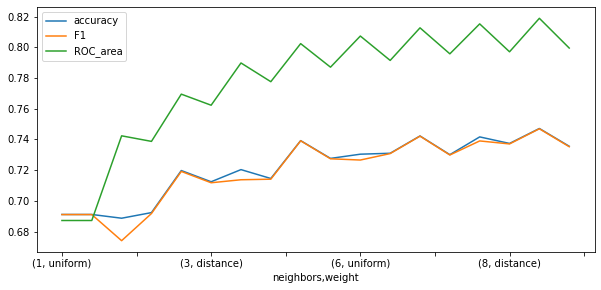

In [33]:
df_knn.plot(figsize = (10,4.5));

### Model Evaluation - Confusion Matrix

In [34]:
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [35]:
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

Test Classification accuracy: 0.7471089470480827


Test Confusion matrix: 
[[1418  405]
 [ 426 1037]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.78      0.77      1823
           1       0.72      0.71      0.71      1463

    accuracy                           0.75      3286
   macro avg       0.74      0.74      0.74      3286
weighted avg       0.75      0.75      0.75      3286



In [36]:
from sklearn.metrics import plot_confusion_matrix

[[1418  405]
 [ 426 1037]]


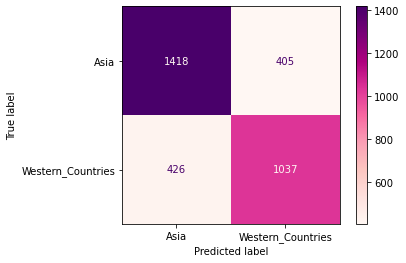

In [37]:
disp = plot_confusion_matrix(knn, X_test, Y_test,
                                 display_labels=['Asia', 'Western_Countries'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

### Test the model on validation set

In [38]:
Y_val_predicted=knn.predict(X_val)
conf_matrix_knn = confusion_matrix(Y_val,Y_val_predicted)
print('Validation Classification accuracy:', knn.score(X_val,Y_val))
print('\n')
print('Validation Confusion Matrix:\n'+ str(confusion_matrix(Y_val, Y_val_predicted)))
print('\n')
print('Validation Classification Report:\n', classification_report(Y_val, Y_val_predicted))

Validation Classification accuracy: 0.7370663420572124


Validation Confusion Matrix:
[[1451  439]
 [ 425  971]]


Validation Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1890
           1       0.69      0.70      0.69      1396

    accuracy                           0.74      3286
   macro avg       0.73      0.73      0.73      3286
weighted avg       0.74      0.74      0.74      3286



### <mark>Result/Comment:
    First, we train the model with various hyper parameters. And then, we found that When neighbors = 9, the model can have the highest accuracy and roc area. 
    Then, we put the testing data set into this model, and get the the accuracy about 74.7%, which is not bad.
    Finally, we  test the model on validation set and get the accuracy equaling to 0.735, which is same as the test classification accuracy.

<mark><font color='hotpink' size=7 face=雅黑>2.With Cross Validation<font><mark>
    
    To avoid the risking of overfitting on the test set, we can use the cross validation to examine.

### Creating Training and Test Datasets

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=random_state)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(13142, 19) (13142,)
(3286, 19) (3286,)


### Feature Selection

In [40]:
from sklearn.feature_selection import SelectKBest, chi2

In [41]:
ch2 = SelectKBest(chi2, k=10)
X_train = ch2.fit_transform(X_train, Y_train)
X_test = ch2.transform(X_test)

In [42]:
print(X_train.shape)
print(X_test.shape)

(13142, 10)
(3286, 10)


In [43]:
cols = ch2.get_support(indices=True)
df.iloc[:,cols].columns

Index(['V45', 'V47', 'V50', 'V52', 'V53', 'V97', 'V120', 'V181', 'V203',
       'V207'],
      dtype='object')

### Feature Scaling

In [44]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Tuning Hyperparameters

In [45]:
df_knn = pd.DataFrame(columns= ['neighbors','weight', 'accuracy', 'F1', 'ROC_area'])

for neighbor_count in range (1,10):
    for weight_metric in ['uniform', 'distance']:    
        knn_ht = KNeighborsClassifier(n_neighbors=neighbor_count, weights=weight_metric) # initialize a KNN classifier
        knn_ht.fit(X_train, Y_train)

        Y_pred_prob_ht = knn_ht.predict_proba(X_test)[:, 1]
       
        accuracy = knn_ht.score(X_test,Y_test)
        f1 = f1_score(Y_test,knn_ht.predict(X_test),average='weighted')
        roc = roc_auc_score(Y_test, Y_pred_prob_ht)       
        
        dict_values = {'neighbors': neighbor_count, 'weight': weight_metric,'accuracy':accuracy,'F1' : f1, 'ROC_area':roc}
        row_to_add = pd.Series(dict_values)
        
        df_knn = df_knn.append(row_to_add, ignore_index=True)

df_knn.set_index(['neighbors','weight'], inplace=True)
df_knn

accuracy        F1  ROC_area
neighbors weight                                
1         uniform   0.688375  0.688311  0.684387
          distance  0.688375  0.688311  0.684387
2         uniform   0.687766  0.673140  0.739426
          distance  0.689897  0.689118  0.736946
3         uniform   0.724589  0.724444  0.766484
          distance  0.716981  0.716779  0.758874
4         uniform   0.723372  0.717739  0.785050
          distance  0.721850  0.721500  0.774325
5         uniform   0.736458  0.736147  0.797957
          distance  0.726719  0.726375  0.783688
6         uniform   0.729763  0.726339  0.805985
          distance  0.729763  0.729444  0.788452
7         uniform   0.744674  0.744613  0.813670
          distance  0.734327  0.734148  0.794312
8         uniform   0.743761  0.741319  0.817614
          distance  0.738284  0.738155  0.797695
9         uniform   0.748631  0.748681  0.819129
          distance  0.737979  0.738006  0.798138

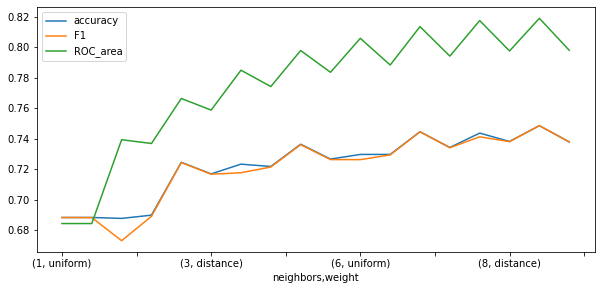

In [46]:
df_knn.plot(figsize = (10,4.5));

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
k_range = list(range(1, 10))
weight_options = ['uniform', 'distance']

In [49]:
param_grid = dict(n_neighbors=k_range, weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'weights': ['uniform', 'distance']}


In [50]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [51]:
print(grid.best_score_)
print(grid.best_params_)

0.6870014294303308
{'n_neighbors': 9, 'weights': 'uniform'}


In [52]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='f1_macro')

In [53]:
print(grid.best_score_)
print(grid.best_params_)

0.6820130908576367
{'n_neighbors': 9, 'weights': 'uniform'}


In [54]:
grid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc')
grid.fit(X, Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=9),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [55]:
print(grid.best_score_)
print(grid.best_params_)

0.7536564530579201
{'n_neighbors': 9, 'weights': 'distance'}


###  Model Evaluation

In [56]:
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform')
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=9)

In [57]:
scores_accuracy =  cross_val_score(knn, X_test, Y_test, cv=5, scoring = 'accuracy')
scores_accuracy

array([0.72796353, 0.73668189, 0.72298326, 0.72146119, 0.74581431])

In [58]:
scores_accuracy.mean()

0.7309808330210545

In [59]:
scores_f1_macro =  cross_val_score(knn, X_test, Y_test, cv=5, scoring = 'f1_macro')
scores_f1_macro

array([0.72618707, 0.73461363, 0.71600323, 0.71844506, 0.74367654])

In [60]:
scores_f1_macro.mean()

0.7277851066516503

In [61]:
metrics = ['f1_macro', 'precision_macro', 'recall_macro', ]
scores_multiple = cross_validate(knn, X_test, Y_test, cv=5, scoring = metrics)
sorted(scores_multiple.keys())  

['fit_time',
 'score_time',
 'test_f1_macro',
 'test_precision_macro',
 'test_recall_macro']

In [62]:
print('Avg. Precision:', scores_multiple['test_precision_macro'].mean())   
print('Avg. Recall:', scores_multiple['test_recall_macro'].mean())    
print('Avg. f1:', scores_multiple['test_f1_macro'].mean())   

Avg. Precision: 0.7283921458693774
Avg. Recall: 0.7283035672541962
Avg. f1: 0.7277851066516503


In [63]:
Y_test_predicted = knn.predict(X_test)
conf_matrix_knn = confusion_matrix(Y_test, Y_test_predicted)
print("Test Classification accuracy:", knn.score(X_test,Y_test))
print("\n")
print ("Test Confusion matrix: \n" + str(conf_matrix_knn))
print("\n")
print("Test Classification Report:\n",classification_report(Y_test, Y_test_predicted))

Test Classification accuracy: 0.7486305538648813


Test Confusion matrix: 
[[1407  416]
 [ 410 1053]]


Test Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      1823
           1       0.72      0.72      0.72      1463

    accuracy                           0.75      3286
   macro avg       0.75      0.75      0.75      3286
weighted avg       0.75      0.75      0.75      3286



<mark><font color='hotpink' size=7 face=雅黑> Classification Trees<font><mark>

In [64]:
import pandas as pd
import numpy as np
import graphviz
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
pd.set_option('display.notebook_repr_html', True)

In [65]:
def print_tree(d_tree, f_names, c_names=None):
    dot_data = tree.export_graphviz(d_tree, out_file=None, feature_names=f_names, class_names=c_names, 
                                    filled=True, rounded=True, special_characters=True)  
    graph = graphviz.Source(dot_data)  
    return graph 

In [66]:
from sklearn.datasets import load_iris
from sklearn import tree

In [67]:
df.head()

,V10,V23,V45,V47,V50,V52,V53,V67,V70,V71,V97,V120,V143,V163,V167,V172,V181,V203,V207,Outcome
3330,3,7,0,0,1,0,2,0,5,2,5,2,2,2,1,1,1,5,0,0
3331,2,7,0,0,1,0,0,2,5,1,9,1,3,3,0,0,0,9,1,0
3332,1,2,1,2,2,1,2,1,0,3,4,2,3,3,0,1,0,8,8,0
3333,2,7,0,2,1,1,1,2,4,2,5,0,2,1,1,0,3,9,6,0
3334,2,2,0,1,1,1,1,2,1,0,4,1,1,1,3,1,2,7,0,0


In [68]:
df.Outcome.value_counts()

0    9316
1    7112
Name: Outcome, dtype: int64

In [69]:
X1 = df.drop('Outcome', axis=1) #indepedent
y1 = df.Outcome #outcome variable

X1.head()

,V10,V23,V45,V47,V50,V52,V53,V67,V70,V71,V97,V120,V143,V163,V167,V172,V181,V203,V207
3330,3,7,0,0,1,0,2,0,5,2,5,2,2,2,1,1,1,5,0
3331,2,7,0,0,1,0,0,2,5,1,9,1,3,3,0,0,0,9,1
3332,1,2,1,2,2,1,2,1,0,3,4,2,3,3,0,1,0,8,8
3333,2,7,0,2,1,1,1,2,4,2,5,0,2,1,1,0,3,9,6
3334,2,2,0,1,1,1,1,2,1,0,4,1,1,1,3,1,2,7,0


### Train the data

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X1, y1, train_size=0.5, random_state=23)
print(len(X_train))
print(len(X_test))

8214
8214


### Train the tree

In [71]:
clftree = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12, max_features=3, random_state=23)
clftree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, max_features=3, max_leaf_nodes=12,
                       random_state=23)

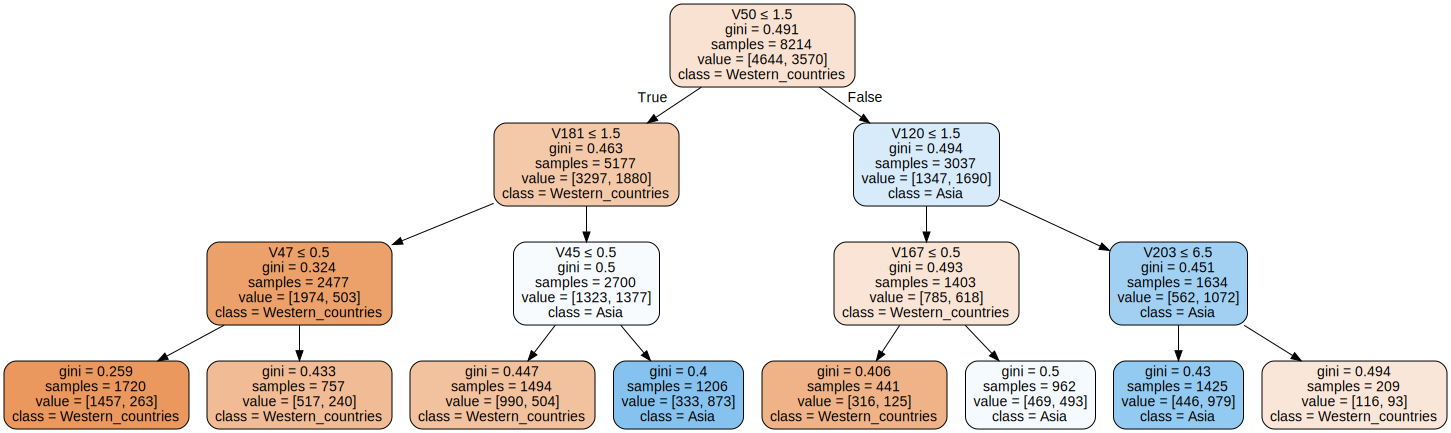

In [72]:
graphClf = print_tree(d_tree=clftree, f_names=X1.columns, c_names=['Western_countries', 'Asia'])                                                         
graphClf

In [73]:
with open('iris.png','wb') as f:
    f.write(graphClf.pipe(format='png'))

### <mark>Comment: 
    We can see V50 (When a mother works for pay, the children will suffer or not) is the most important variable to different whether that region belongs to Asia or Western area. 
    For example, if the value of V50 in one sample is less than 1.5, the tree will put that sample into western area. Otherwise, the tree will put that sample into Asia area. 
    Furthermore, the gini value equals to 0.491. ---> 1-(4644/8214)**2-(3570/8214)**2
    From the value of 0.491 of the gini, we can know V50 has a not bad ability to differentiate the different samples. 

### Training Set Accuracy

In [74]:
print("Training Set Classification Accuracy:", clftree.score(X_train,y_train))

print("Confusion Matrix:")
cm = pd.DataFrame(confusion_matrix(y_train, clftree.predict(X_train)), index=['Western_countries', 'Asia'], columns=['Western_countries', 'Asia'])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
display(cm)

print("Classification Report:")
print(classification_report(y_train, clftree.predict(X_train)))

Training Set Classification Accuracy: 0.6989286583881178
Confusion Matrix:


Predicted,Western_countries,Asia
Actual,,
Western_countries,3396,1248
Asia,1225,2345


Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      4644
           1       0.65      0.66      0.65      3570

    accuracy                           0.70      8214
   macro avg       0.69      0.69      0.69      8214
weighted avg       0.70      0.70      0.70      8214



### Test Set Accuracy

In [75]:
print("Test Set Classification Accuracy:", clftree.score(X_test,y_test))

print("Confusion Matrix:")
cm = pd.DataFrame(confusion_matrix(y_test, clftree.predict(X_test)), index=['Western_countries', 'Asia'], columns=['Western_countries', 'Asia'])
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
display(cm)

print("Classification Report:")
print(classification_report(y_test, clftree.predict(X_test)))

Test Set Classification Accuracy: 0.7003895787679572
Confusion Matrix:


Predicted,Western_countries,Asia
Actual,,
Western_countries,3453,1219
Asia,1242,2300


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      4672
           1       0.65      0.65      0.65      3542

    accuracy                           0.70      8214
   macro avg       0.69      0.69      0.69      8214
weighted avg       0.70      0.70      0.70      8214



### <mark>Comment:
    We can see, overall, the train set accuracy is 70%, which is actually not bad for the zero and one cases. Furthermore, we can see, overall, test set accuracy almost have similar performance.

<mark><font color='hotpink' size=8 face=雅黑> Logistic Regression<font><mark>

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pylab as plt
%matplotlib inline 

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, plot_roc_curve, roc_auc_score, classification_report, precision_score, accuracy_score, recall_score, f1_score

In [77]:
Y = df['Outcome']
X = df.drop(columns=['Outcome'])

In [78]:
X_train, X_valid, Y_train, Y_valid = train_test_split(X, Y, test_size=0.25, random_state=42)

### Regularization

In [79]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(X_train, Y_train)

LogisticRegression(C=1e+42, solver='liblinear')

In [80]:
print('intercept ', logit_reg.intercept_[0])
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

intercept  -3.4090390945253572


,coeff
V10,0.331762
V23,-0.039453
V45,0.453218
V47,0.126793
V50,0.199521
V52,0.348849
V53,-0.013833
V67,0.038160
V70,-0.157464
V71,0.126493


In [81]:
Y_valid_predicted = logit_reg.predict(X_valid) 
Y_valid_pred_prob = logit_reg.predict_proba(X_valid) 

logit_result = pd.DataFrame({'actual_class': Y_valid, 
                             'P(Y=0)': [p[0] for p in Y_valid_pred_prob],
                             'P(Y=1)': [p[1] for p in Y_valid_pred_prob],
                             'predicted_class': Y_valid_predicted})

logit_result[logit_result.predicted_class == 1].head()

,actual_class,P(Y=0),P(Y=1),predicted_class
28520,1,0.361241,0.638759,1
61629,1,0.038367,0.961633,1
72233,1,0.115834,0.884166,1
26395,1,0.284845,0.715155,1
51713,1,0.283248,0.716752,1


### <mark>Comment:
    For example, 28520 have the 63.8% probablity to be predicted as the class 1, meaning this variable is predicted in Asia area.

In [82]:
logit_result[logit_result.predicted_class == 0].head()

,actual_class,P(Y=0),P(Y=1),predicted_class
21723,0,0.927944,0.072056,0
12780,1,0.804972,0.195028,0
69697,0,0.943526,0.056474,0
80215,0,0.886837,0.113163,0
21189,0,0.631270,0.368730,0


In [83]:
conf_matrix = confusion_matrix(Y_valid, Y_valid_predicted)
print('************Logistic Regression************')
print("Validation Set Classification accuracy:", logit_reg.score(X_valid,Y_valid))
print("\n")
print ("Validation Set Confusion matrix: \n" + str(conf_matrix))
print("\n")
print("Validation Set Classification Report:\n",classification_report(Y_valid, Y_valid_predicted))

************Logistic Regression************
Validation Set Classification accuracy: 0.7472607742878014


Validation Set Confusion matrix: 
[[1850  456]
 [ 582 1219]]


Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      2306
           1       0.73      0.68      0.70      1801

    accuracy                           0.75      4107
   macro avg       0.74      0.74      0.74      4107
weighted avg       0.75      0.75      0.75      4107



[[1850  456]
 [ 582 1219]]


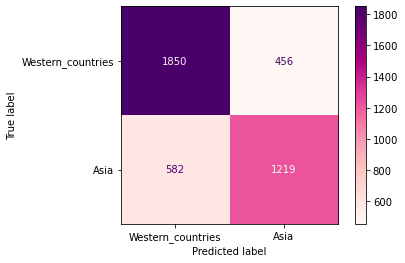

In [84]:
disp = plot_confusion_matrix(logit_reg, X_valid, Y_valid,
                                 display_labels=['Western_countries', 'Asia'],
                                 cmap=plt.cm.RdPu,
                                 normalize=None)
print(disp.confusion_matrix)

Area under the ROC: 0.8157870278292922


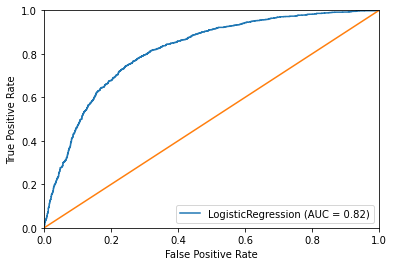

In [85]:
viz = plot_roc_curve(logit_reg, X_valid, Y_valid)
print('Area under the ROC:', viz.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

### <mark>Overall Comment:
    We can use the confusion matrix and classification accuracy to evaluate our model.
    So, for the accuracy of our classifier on the validation test, it is about 74% and for predicting zero and one.
    Furthermore, we can see, when we plug the confusion matrix, most of our data are into true negative and ture positive. 
    Even though there are some samples are mispredicted,  overall data we have is still under control.
    Also, we can use auc curve to see how our model works so here. 
    Actually, the Auc is doing pretty good is very close to one and significantly larger than the random guess.

### Crossvalidated Estimators

In [86]:
logit_cv = LogisticRegressionCV(penalty='l1', solver='liblinear', cv=5, max_iter=2000)
logit_cv.fit(X_train, Y_train)

LogisticRegressionCV(cv=5, max_iter=2000, penalty='l1', solver='liblinear')

In [87]:
print('intercept ', logit_reg.intercept_[0])
pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns)

intercept  -3.4090390945253572


,coeff
V10,0.331762
V23,-0.039453
V45,0.453218
V47,0.126793
V50,0.199521
V52,0.348849
V53,-0.013833
V67,0.038160
V70,-0.157464
V71,0.126493


In [88]:
Y_valid_pred_cv = logit_cv.predict(X_valid) 

conf_matrix_cv = confusion_matrix(Y_valid, Y_valid_pred_cv)
print('************Logistic Regression************')
print("Validation Set Classification accuracy:", logit_reg.score(X_valid,Y_valid))
print("\n")
print ("Validation Set Confusion matrix: \n" + str(conf_matrix_cv))
print("\n")
print("Validation Set Classification Report:\n",classification_report(Y_valid, Y_valid_pred_cv))

************Logistic Regression************
Validation Set Classification accuracy: 0.7472607742878014


Validation Set Confusion matrix: 
[[1850  456]
 [ 582 1219]]


Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      2306
           1       0.73      0.68      0.70      1801

    accuracy                           0.75      4107
   macro avg       0.74      0.74      0.74      4107
weighted avg       0.75      0.75      0.75      4107



Area under the ROC: 0.815788472531161


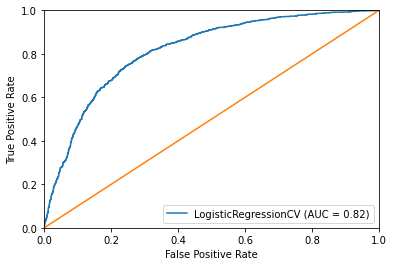

In [89]:
viz_cv = plot_roc_curve(logit_cv, X_valid, Y_valid)
print('Area under the ROC:', viz_cv.roc_auc)   
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();

### <mark>Comment:
    The previous area under the AUC is 0.8157870278292922. Therefore, from results, we see actually the accuracy didn't increase a lot, because the original one is good enough. 
    So, this model does well and AUC curves performs robust.

<mark><font color='hotpink' size=8 face=雅黑>The Naive Bayes Classifiern<font><mark>

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)

GaussianNB()

In [92]:
Y_valid_pred_nb = nb_model.predict(X_valid)

conf_matrix_nb = confusion_matrix(Y_valid, Y_valid_pred_nb)
print('************Logistic Regression************')
print("Validation Set Classification accuracy:", nb_model.score(X_valid,Y_valid))
print("\n")
print ("Validation Set Confusion matrix: \n" + str(conf_matrix_nb))
print("\n")
print("Validation Set Classification Report:\n",classification_report(Y_valid, Y_valid_pred_nb))

************Logistic Regression************
Validation Set Classification accuracy: 0.7399561723886048


Validation Set Confusion matrix: 
[[1768  538]
 [ 530 1271]]


Validation Set Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77      2306
           1       0.70      0.71      0.70      1801

    accuracy                           0.74      4107
   macro avg       0.74      0.74      0.74      4107
weighted avg       0.74      0.74      0.74      4107



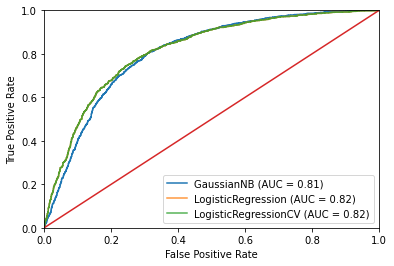

In [93]:
viz_nb = plot_roc_curve(nb_model, X_valid, Y_valid)

ax = plt.gca() 
viz.plot(ax=ax, alpha=0.8) 
viz_cv.plot(ax=ax, alpha=0.8)  

plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.0])
plt.show();